In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn import naive_bayes as skbayes

# Our classes
sys.path.insert(0, os.getcwd() + '/../')

from src.utils import dataset
from src.utils import data
from src.utils import evaluation
from src.supervised_learning.naive_bayes import GaussianNaiveBayes

# Gaussian Naive Bayes

In [2]:
# Load dataset
n_classes = 2

iris_data = datasets.load_iris()
x = iris_data.data[:, :n_classes]
y = iris_data.target
x_train, y_train, x_test, y_test = dataset.split_train_test_dataset(x, y, split_size=0.6)

/Users/kristof/.pyenv/versions/3.5.0/envs/explainable-ml/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


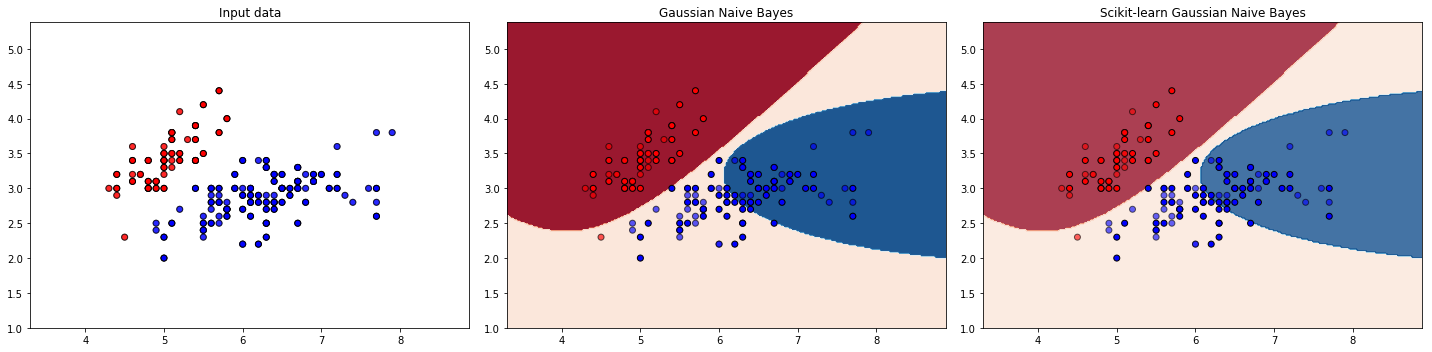

In [5]:
# Parameter for classification
h = .02

# Plot data before classification, after classification without our and scikit-learn classifier
# Based on: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
plt.figure(1, figsize=(20, 5))

# Meshgrids
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_test_slice = np.c_[xx.ravel(), yy.ravel()]

# Original data
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF']) # Red, Blue
ax = plt.subplot(1, 3, 1)
ax.set_title("Input data")
# Plot the training points
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# and testing points
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# Our classifier
clf = GaussianNaiveBayes()
clf.train(x_train, y_train)
y_pred = clf.predict(x_test_slice)
y_pred = np.reshape(y_pred, xx.shape)

ax = plt.subplot(1, 3, 2)
ax.set_title("Gaussian Naive Bayes")
ax.contourf(xx, yy, y_pred, cmap=cm, alpha=.8)
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k') # Training points
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6) # Test points
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# Scikit-learn classifier
clf = skbayes.GaussianNB()
y_pred = clf.fit(x_train, y_train).predict(x_test_slice)
y_pred = np.reshape(y_pred, xx.shape)

ax = plt.subplot(1, 3, 3)
ax.set_title("Scikit-learn Gaussian Naive Bayes")
ax.contourf(xx, yy, y_pred, cmap=cm, alpha=.8)
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k') # Training points
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6) # Test points
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()